In [67]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import tensorboard as tb

In [104]:
log_dir = Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.00001")

# read_csv(..., skiprows=1000000, nrows=999999)
# runs = [pd.read_csv(p, sep="\t", names=["datetime", "state", "action", "reward", "next_state", "done", "loss"]) for p in logfiles]
pre_runs = [pd.read_csv(p, nrows=14, names=["epoch", "g_loss", "nll_oracle", "nll_gen"]) for p in log_dir.rglob("*.csv")]
adv_runs = [pd.read_csv(p, skiprows=15, names=["adv_step", "nll_oracle", "nll_gen"]) for p in log_dir.rglob("*.csv")]

In [88]:

# Get best NLLs

best_nlls = []
for run in adv_runs:
    run_nll_oracles = run["nll_gen"].str.replace('nll_gen: ', '')
    # print(run_nll_oracles)
    best_nlls.append(run_nll_oracles.min())

best_nlls = np.array(best_nlls, dtype=np.float32)
mean = np.mean(best_nlls)
std = np.std(best_nlls)
print(best_nlls)
print(mean)
print(std)

[4.3237 4.33   3.8595]
4.1710668
0.22032592


In [117]:
log_dirs = {
    "1.00001": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.00001"),
    "1.1": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.1"),
    "1.3": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.3"),
    "1.5": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.5"),
    "1.7": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha1.7"),
    "2.0": Path("../oracle/experiments/cc_out/entmax_alphas/20221210/oracle/alpha2.0"),
}

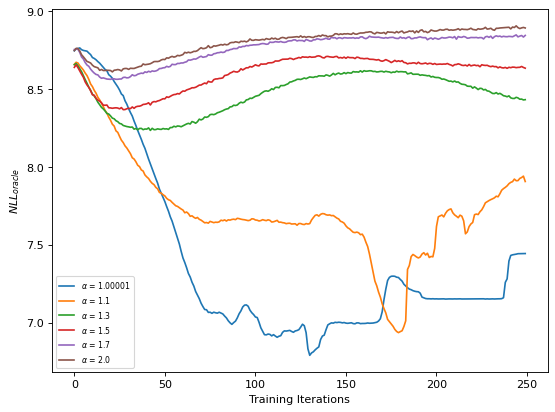

In [133]:
# NLL plots - averaged across runs

f = plt.figure(figsize=(8,6), dpi=80)
steps = np.linspace(0, 5000, 250)

avg_nlls = {}
for alpha, ld in log_dirs.items():
    adv_runs = [pd.read_csv(p, skiprows=15, names=["adv_step", "nll_oracle", "nll_gen"]) for p in ld.rglob("*.csv")]
    nlls = np.array([run["nll_oracle"].str.replace('nll_oracle: ', '').values.astype(float) for run in adv_runs])
    # avg_nlls[alpha] = nlls.mean(axis=0)
    avg_nlls = nlls.mean(axis=0)
    plt.plot(x=steps, y=avg_nlls, label=r"$\alpha$ = " + alpha)
    
plt.legend(prop={'size': 7})
plt.xlabel("Training Iterations")
plt.ylabel(r"$NLL_{oracle}$")
# plt.show()
plt.savefig("entmax_alphas_nll.png")

# single_nll = adv_runs[3]["nll_oracle"].str.replace('nll_oracle: ', '').values.astype(float)

# for avg_nlls 
# print(avg_nlls.shape)
# plt.plot(avg_nlls)
# plt.plot(single_nll)
# plt.plot(nlls)
# for run in adv_runs:
#     # concat_runs = pd.concat((df1, df2))

# print df_concat.mean()